# Salary Estimation using KNN

### Importing required libraries

In [21]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

### importing the dataset 

In [22]:
dataset = pd.read_csv("salary.csv")

In [23]:
dataset.head()

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K


In [24]:
dataset.shape

(32561, 5)

### mapping income to binary

In [25]:
income_set = set(dataset['income'])
dataset['income'] = dataset['income'].map({'<=50K': 0, '>50K': 1}).astype(int)
print(dataset.head)

<bound method NDFrame.head of        age  education.num  capital.gain  hours.per.week  income
0       90              9             0              40       0
1       82              9             0              18       0
2       66             10             0              40       0
3       54              4             0              40       0
4       41             10             0              40       0
...    ...            ...           ...             ...     ...
32556   22             10             0              40       0
32557   27             12             0              38       0
32558   40              9             0              40       1
32559   58              9             0              40       0
32560   22              9             0              20       0

[32561 rows x 5 columns]>


### splitting dependent and independant variable 

In [26]:
x = dataset.iloc[:,:-1]
print(x)

       age  education.num  capital.gain  hours.per.week
0       90              9             0              40
1       82              9             0              18
2       66             10             0              40
3       54              4             0              40
4       41             10             0              40
...    ...            ...           ...             ...
32556   22             10             0              40
32557   27             12             0              38
32558   40              9             0              40
32559   58              9             0              40
32560   22              9             0              20

[32561 rows x 4 columns]


In [27]:
y = dataset.iloc[:,-1]
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 32561, dtype: int32


### splitting up training and test data

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [30]:
print(x_train)

[[ 0.17780667 -0.03649105 -0.14474897  0.85163208]
 [-0.99324468  1.13074461 -0.14474897 -1.2548683 ]
 [-0.99324468 -0.42556961 -0.14474897 -0.03957962]
 ...
 [-0.92005397 -0.81464816 -0.14474897  0.85163208]
 [ 0.39737879  1.51982317 -0.14474897 -0.03957962]
 [ 0.03142525 -0.42556961  0.83321509 -0.03957962]]


In [31]:
print(x_test)

[[ 1.2756673  -1.98188383 -0.14474897 -0.03957962]
 [-1.43238893 -0.42556961 -0.14474897 -1.2548683 ]
 [-1.1396261  -0.03649105 -0.14474897 -0.44467585]
 ...
 [-0.55410042  0.3525875  -0.14474897 -0.03957962]
 [ 0.17780667 -1.59280527 -0.14474897 -0.03957962]
 [-0.11495617  1.13074461 -0.14474897 -0.03957962]]


### finding out the best K_value

Text(0, 0.5, 'errors')

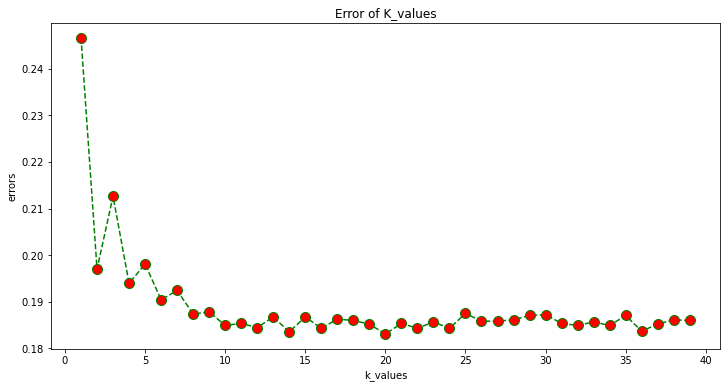

In [32]:
error =[]
from sklearn.neighbors import KNeighborsClassifier

for i in range(1, 40):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    error.append(np.mean(pred != y_test))

plt.figure(figsize=(12,6))
plt.plot(range(1,40),error,color='green',linestyle='dashed',marker='o',markerfacecolor = 'red',markersize=10)
plt.title('Error of K_values')
plt.xlabel('k_values')
plt.ylabel('errors')


### model training

In [33]:
model = KNeighborsClassifier(n_neighbors = 16,metric = 'minkowski', p=2)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=16)

### testing the model

In [34]:
y_pred = model.predict(x_test) 

### confusion matrix and accuracy

In [35]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(cm)
print("ACCURACY:{0}".format(accuracy_score(y_test,y_pred)*100))

Confusion Matrix
[[4708  258]
 [ 942  605]]
ACCURACY:81.57531091662828


### Prediction for New data

In [37]:
age = int(input('Enter the age:'))
edu_no = int(input('Enter the Education_no:'))
cap_g = int(input('Enter the Captial Gain:'))
hpw = int(input('Enter the Working Hours per Week:'))
newemp = [[age,edu_no,cap_g,hpw]]

result = model.predict(sc.transform(newemp))
print('result:',result)

if result == 1:
    print('Employee might Got above 50K')
else:
    print("Employee might not Got above 50K")

Enter the age:40
Enter the Education_no:10
Enter the Captial Gain:0
Enter the Working Hours per Week:40
result: [0]
Emplyee might not Got above 50K
